# BEMM461 - Coursework 2 : Telecom Customer Churn Dashboard

## Introduction

In this report, we explore the details involved in developing a dashboard with the goal of identifying patterns and insights from the telecom customer churn data of a fictitious telecom service provider.

Firstly, for a brief synopsis, an executive summary is given that highlights the key objectives and takeaways from the project. Next, it delves into the development of the strategic dashboard, giving an extensive description of the background of the project, going over the design process and articulating the decision-making procedure. A review of analytical methods and tools used is provided followed by detailed discussions on the selected dataset and a few key visualizations. The work culminates in a reflective evaluation and an overarching conclusion. 


## Table of Links
### Table
| Description | Link |
| -- | -- |
| Reflective blog | https://ele.exeter.ac.uk/mod/oublog/view.php?id=2698275 |
| Chosen Dataset | https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113 |

## Table of Contents
1. Executive Summary
2. Project Dashboard
3. Background to the Project
4. Articulation of Decision Making Process
5. Review of Analytics Methods Chosen
6. Review of Available Tools
7. Review of Chosen Datasets 
8. Visualisation of Data with Accompanying Code
9. Reflective Evaluation
10. Conclusion


## 1. Executive Summary

This comprehensive report navigates the development of a strategic dashboard for analyzing customer churn in the telecom industry, focusing on a fictional telecom service provider. The exploration unfolds in a Jupyter notebook, meticulously detailing objectives, design processes, and analytical methods.

The telecom industry grapples with a critical challenge in customer loyalty, making customer churn a prevalent concern. The report outlines the significance of churn rate as a key performance indicator, emphasizing its impact on business sustainability. Key objectives include quantifying the financial loss associated with churn and analyzing patterns to identify crucial insights.

The decision-making process draws inspiration from industry best practices, incorporating principles from Stephen Few, Edward Tufte, and others. Strategic layout design integrates the "three threes" principle and the MAD framework, providing a structured approach to monitor, analyze, and manage data.

Implementation involves consistent color schemes, interactive features, and impactful gauge charts, following principles from Munzner and Wexler. Challenges with the Dash framework are discussed, considering alternative tools such as Microsoft Power BI and Google Charts.

The report critically reviews the chosen dataset's challenges and justifies its use for analysis. Visualization examples, including a bubble map and horizontal bar chart, are discussed alongside the rationale and coding involved.

A reflective evaluation acknowledges the project's contributions to skill development and identifies areas for refinement, emphasizing the importance of a more pertinent real-world dataset and improved descriptive analyses.

In conclusion, the report successfully achieves key objectives by providing valuable insights into the telecom industry's customer churn dynamics through a strategic dashboard. It serves as a comprehensive resource for professionals seeking a deeper understanding of analytical tools and visualization techniques in the telecom context.



## 2. Project Dashboard

Please install the dependencies using the terminal, and reduce the browser zoom if necessary. 

- dash-bootstrap-components (pip install dash-bootstrap-components)
- plotnine (pip install plotnine)
- dash_daq (pip install dash_daq)

In [6]:
#############################################################################################################################################
#Import Statements
from dash import Dash, html, dash_table, dcc
import dash_bootstrap_components as dbc
from matplotlib.pyplot import margins
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_bar, coord_flip, labs, ggsave
from dash.dependencies import Input, Output
from plotly import tools
import plotly.graph_objs as go
import plotly.subplots as sp
import dash_daq as daq
from plotnine import ggplot, aes, geom_point, geom_segment, theme_minimal, theme, labs, geom_text, element_rect, element_blank,element_text
from plotly.tools import mpl_to_plotly
#############################################################################################################################################
# Data Exploration
df_temp = pd.read_csv('https://raw.githubusercontent.com/Mukundh141-exeter/BEMM461_Course_Work_2/main/Telco_customer_churn_status.csv')

# Check for null values in the "Customer ID" column
null_values = df_temp['Customer ID'].isnull().any()

# Check for duplicate values in the "Customer ID" column
duplicate_values = df_temp['Customer ID'].duplicated().any()
###############################################################################################################################################
# KPI Calculations

# Get the total number of customers using 'CustomerID' column
totalCustomers = len(df_temp['Customer ID'])

# Filter on the column 'Churn Label' to obtain total number of chruned customers
df_churned = df_temp.loc[df_temp['Churn Label'] == 'Yes']
totalChurnedCustomers = len(df_churned['Customer ID'])

#Filter on the column 'Customer Status' to obtain total number of customers at start of the period 
df_stayed = df_temp.loc[df_temp['Customer Status'] == 'Stayed']
totalCustomersQuarterStart = len(df_stayed['Customer ID'])

#Churn rate calculation
#Churn rate = (N.o of customers that churn)/(Total number of customers at start of period)
churnRate = round(((totalChurnedCustomers)/(totalCustomersQuarterStart) * 100), 2)

#Customer retention rate 
#((Total number of customers at the beginning of the quarter - Number of customers churned)
# / Total number of customers at the beginning of the quarter) * 100
customerRetentionRate = round(((totalCustomersQuarterStart-totalChurnedCustomers)/totalCustomersQuarterStart)*100,2)

# Read Data
df_churn = pd.read_csv('https://raw.githubusercontent.com/Mukundh141-exeter/BEMM461_Course_Work_2/main/Telco_customer_churn.csv')

# Filter on the column 'Churn Label' to obtain the total number of churned customers
df_revenue_loss= df_churn.loc[df_churn['Churn Label'] == 'Yes']

# Create a new data frame with the desired columns
df_revenue_loss = df_revenue_loss[['CustomerID', 'Churn Label', 'Total Charges']]

# Convert 'Total Charges' to numeric
df_revenue_loss['Total Charges'] = pd.to_numeric(df_revenue_loss['Total Charges'], errors='coerce')

# Check for any missing values after conversion
print("Null values after conversion:", df_revenue_loss['Total Charges'].isnull().sum())

# Calculate total revenue loss
total_revenue_loss = round(df_revenue_loss['Total Charges'].sum(), 2)

formatted_sum = '{:,.2f}'.format(total_revenue_loss)
#############################################################################################################################################
# Bar Graph

# Filter on the column 'Churn Label' to obtain the total number of churned customers
# Create a new data frame with the desired columns
df_reasons = df_churn.loc[df_churn['Churn Label'] == 'Yes']
df_reasons = df_reasons[['CustomerID','Churn Label', 'Churn Reason']]

# Group by 'Churn Reason' and count the number of rows for each reason
reason_counts = df_reasons.groupby('Churn Reason').size().reset_index(name='Number of Rows')

# Sort the DataFrame by the 'Number of Rows' column in descending order
reason_counts = reason_counts.sort_values(by='Number of Rows', ascending=True)

# Convert 'Churn Reason' to a categorical variable with levels ordered by count in descending order
reason_counts['Churn Reason'] = pd.Categorical(reason_counts['Churn Reason'], categories=reason_counts['Churn Reason'])

# Bar Graph colour 
bar_color = '#9097F4'

# Create a ggplot object with a bar plot, flip the axes, set custom labels, and order the bars
reasons_bar_graph = (
    ggplot(reason_counts, aes(x='Churn Reason', y='Number of Rows'))
    + geom_bar(stat='identity', fill=bar_color)
    + coord_flip()
    + labs(x='', y='Number of customers', title='Churn Reason Distribution ')
)
#############################################################################################################################################
# Lollipop Chart

# Filter on the column 'Churn Label' to obtain the total number of churned customers
df_gender = df_churn.loc[df_churn['Churn Label'] == 'Yes']

# Create a new dataframe with the desired columns
df_gender = df_gender[['CustomerID', 'Churn Label', 'Gender']]

# Group by 'Gender' and count the number of churned customers
gender_counts = df_gender.groupby('Gender').size().reset_index(name='Number of Churned Customers')

# Assuming gender_counts is your DataFrame
gender_fig = px.scatter(gender_counts, x='Gender', y='Number of Churned Customers',
                        size='Number of Churned Customers', color='Gender',
                        title='Number of Churned Customers by Gender',
                        labels={'Number of Churned Customers': 'Number of Churned Customers'},
                        template='plotly_white',  # You can choose a different template if desired
                        range_y=[0, 1100],  # Set y-axis range
                        size_max=10,  # Increase the size of the lollipop markers
                        )

gender_fig.update_traces(mode='markers+text',  # Display text inside markers
                         #text=gender_counts['Number of Churned Customers'],  # Display count inside lollipops
                         textposition='top center',  # Adjust text position
                         )

# Add trace lines
for index, row in gender_counts.iterrows():
    gender_fig.add_trace(
        go.Scatter(x=[row['Gender'], row['Gender']],
                   y=[0, row['Number of Churned Customers']],
                   mode='lines',
                   line=dict(color='grey', width=1),
                   showlegend=False)
    )

# Adjust size and remove labels
gender_fig.update_layout(
    width=300,  # Set the width of the graph
    height=350,  # Set the height of the graph
    margin=dict(l=0, r=10, b=0, t=40),  # Adjust left, right, bottom, and top margins
    xaxis=dict(title='', tickfont=dict(size=10)),  # Remove x-axis label and reduce tick font size
    yaxis=dict(title='', tickfont=dict(size=10)),  # Remove y-axis label and reduce tick font size
    title=dict(text='Number of Churned Customers by Gender', x=0.5, font=dict(size=13)),  # Center title and adjust font size
    legend=dict(title=dict(text=''), font=dict(size=8)),  # Remove legend title and reduce font size
    bargap=0.2,  # Adjust the gap between bars
)
#############################################################################################################################################
# Pie Chart 

# Filter on the column 'Churn Label' to obtain the total number of churned customers
df_payment = df_churn.loc[df_churn['Churn Label'] == 'Yes']

#Create a new data frame with the desired columns
df_payment = df_payment[['CustomerID','Churn Label', 'Payment Method']]

# Group by 'Gender' and count the number of rows for each reason
payment_counts = df_payment.groupby('Payment Method').size().reset_index(name='Churned Customers')

# Specify custom colors
custom_colors = ['#F2BC4F', '#BC5078', '#9097F4', '#E78F7D']

# Create a pie chart
fig_payment = px.pie(payment_counts,
             names='Payment Method',
             values='Churned Customers',
             title='Distribution of Churned Customers by Payment Method',
             width=300,  # Set the width of the graph
             height=150  # Set the height of the graph
             )

# Update the size of the text inside the pie chart and set custom colors
fig_payment.update_traces(textinfo='percent', textfont=dict(size=10),
                  marker=dict(colors=custom_colors, line=dict(color='#FFFFFF', width=2))
                  )


# Make the legend toggleable and move it to the left
fig_payment.update_layout(legend=dict(
                              font=dict(size=9)  # Set the legend font size
                              ),
                  showlegend=True,  # Set showlegend to True
                  title_font=dict(size=10.2),  # Set the title font size
                  margin=dict(l=10, r=60, t=40, b=10)
                  )
#############################################################################################################################################
# Donut Chart

# Filter on the column 'Churn Label' to obtain the total number of churned customers
df_contract = df_churn.loc[df_churn['Churn Label'] == 'Yes']

#Create a new data frame with the desired columns
df_contract = df_contract[['CustomerID','Churn Label', 'Contract']]

# Group by 'Gender' and count the number of rows for each reason
contract_counts = df_contract.groupby('Contract').size().reset_index(name='Churned Customers')

# Specify custom colors
custom_colors = ['#9097F4', '#E78F7D', '#F2BC4F']

# Create a donut chart
fig_contract = px.pie(contract_counts,
                      names='Contract',
                      values='Churned Customers',
                      title='Distribution of Churned Customers by Contract',
                      width=300,  # Set the width of the graph
                      height=150,  # Set the height of the graph
                      hole=0.5  # Set the size of the hole to create a donut chart
                      )

# Update the size of the text inside the pie chart and set custom colors
fig_contract.update_traces(textinfo='percent', textfont=dict(size=10),
                           marker=dict(colors=custom_colors, line=dict(color='#FFFFFF', width=2))
                           )

# Make the legend toggleable and move it to the left
fig_contract.update_layout(legend=dict(
    font=dict(size=10)  # Set the legend font size
),
    showlegend=True,  # Set showlegend to True
    title_font=dict(size=11),  # Set the title font size
    margin=dict(l=10, r=60, t=40, b=10)
)
#############################################################################################################################################
# Bubble Map

# Filter on the column 'Churn Label' to obtain the total number of churned customers
df_map = df_churn.loc[(df_churn['Churn Label'] == 'Yes') & (df_churn['State'] == "California")]

#Create a new data frame with the desired columns
df_map = df_map[['CustomerID','Churn Label', 'City','Latitude','Longitude', "Zip Code"]]

# Group by 'Gender' and count the number of rows for each reason
map_counts = df_map.groupby(['City', 'Latitude', 'Longitude']).size().reset_index(name='Churned Customers')

# Specify a custom color scale for the bubble chart
custom_color_scale = [
    [0.0, '#9097F4'],
    [0.5, '#F2BC4F'],
    [1.0, '#E78F7D']
]

# plotting scatter plot of the data
fig_map = px.scatter_geo(
    map_counts,
    lat='Latitude',
    lon='Longitude',
    hover_name='City',
    size='Churned Customers',
    # title='US County Choropleth Map',
    color='Churned Customers',
    color_continuous_scale=custom_color_scale
)

# Drawing the geo data
fig_map.update_geos(
    scope='usa',
    center=dict(lat=36.2783, lon=-119.4179), 
    showland=True,
    landcolor='rgb(217, 217, 200)',    
)

# Configuring plot layout
fig_map.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),  # Set margins to reduce whitespace
    autosize=False,
    geo=dict(
        projection_rotation=dict(lon=30, lat=30, roll=30),
        lonaxis=dict(
            range=[-200, -120]  # Adjust the longitude range to focus on California
        ),
        lataxis=dict(
            range=[28, 39]  # Adjust the latitude range to focus on California
        )
    ),
    width=300,
    height=350,
    coloraxis_colorbar=dict(
        title=dict(
            text='Customer\nChurn',
            side='right'
        ),
        orientation='v',
        x=0.27,  # Adjust the x-position for the legend
        xanchor='right',
        len=0.75,
        tickfont=dict(size=8)
    ),
    # legend_entrywidth=10,
    title=dict(
        text="Customer Churn in California region",
        x=0.5,
        font=dict(size=14)
    )
)
fig_map.update_mapboxes(pitch=90)
#############################################################################################################################################
# Population Pyramid

# Read data
df_demographics = pd.read_csv('https://raw.githubusercontent.com/Mukundh141-exeter/BEMM461_Course_Work_2/main/Telco_customer_churn_demographics.csv')

df_demographics_churned = df_churn.loc[df_churn['Churn Label'] == 'Yes']

# Merge based on Customer ID
merged_df = pd.merge(df_demographics, df_demographics_churned, left_on='Customer ID', right_on='CustomerID', how='inner')

# Filter the rows where Customer ID and CustomerID match
result_df = df_demographics[df_demographics['Customer ID'].isin(merged_df['Customer ID'])]

#Select only the required columns
#Create a new data frame with the desired columns
result_df = result_df[['Customer ID','Gender','Age']]

# Group by 'Age' and 'Gender' and calculate the count for each group
count_by_age_gender = result_df.groupby(['Age', 'Gender']).size().reset_index(name='Count')

# Merge the count back to the original DataFrame based on 'Age' and 'Gender'
result_df = pd.merge(result_df, count_by_age_gender, on=['Age', 'Gender'], how='left')

# If you want to keep the 'Customer ID', 'Gender', 'Age' columns only, you can do this
result_df = result_df[['Customer ID', 'Gender', 'Age', 'Count']]

# Sort the DataFrame for males in ascending order based on 'Age'
result_male = result_df[result_df["Gender"] == "Male"].sort_values(by='Age', ascending=True)

trace_male = go.Bar(
    x=result_male["Count"],
    y=result_male["Age"],
    orientation="h",
    name="Male",
    marker=dict(color="#1f77b4")
)

# Sort the DataFrame for males in ascending order based on 'Age'
result_male = result_df[result_df["Gender"] == "Male"].sort_values(by='Age', ascending=True)

trace_male = go.Bar(
    x=result_male["Count"],
    y=result_male["Age"],
    orientation="h",
    name="Male",
    marker=dict(color="#E78F7D")
)

# Sort the DataFrame for females in descending order based on 'Age'
result_female = result_df[result_df["Gender"] == "Female"].sort_values(by='Age', ascending=False)

trace_female = go.Bar(
    x=result_female["Count"] * -1,
    y=result_female["Age"],
    orientation="h",
    name="Female",
    marker=dict(color="#9097F4")
)

# Create the layout
layout = go.Layout(
    title="Population Pyramid",
    title_font=dict(size=15),  # Adjust the title font size
    xaxis=dict(title="Count", title_font=dict(size=10), tickfont=dict(size=10)),  # Adjust x-axis label and tick font size
    yaxis=dict(title="Age", title_font=dict(size=10), tickfont=dict(size=10)),  # Adjust y-axis label and tick font size
    barmode="overlay",
    bargap=0.2,  # Adjust the bargap to reduce the length of the bars
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust the margin as needed
    height=240,  # Adjust the height of the chart
    width=550,  # Adjust the width of the chart
    legend=dict(font=dict(size=8)),  # Adjust legend font size
)

# Create the figure
fig_demographics = go.Figure(data=[trace_male, trace_female], layout=layout)
#############################################################################################################################################
# Card Generation 

card_total_customers = html.Div(
    [
        html.H1(f"{totalCustomers}", style={'color':'#535D6D','font-family': 'Helvetica','font-size': '30px','font-weight':'bold'}),
        html.H3("Total Customers",style={'color':'#535D6D','font-family': 'Helvetica','font-size': '16px','font-weight':'normal'})
        
    ], style={'border': '1px solid #ddd', 'border-radius': '20px', 'padding': '8px', 'background-color':'#FFFFFF', 'text-align': 'center'}
)

card_churned_customers = html.Div(
    [
        html.H1(f"{totalChurnedCustomers}", style={'color':'#535D6D','font-family': 'Helvetica','font-size': '30px','font-weight':'bold'}),
        html.H3("Churned Customers",style={'color':'#535D6D','font-family': 'Helvetica','font-size': '16px','font-weight':'normal'})
        
    ], style={'border': '1px solid #ddd', 'border-radius': '20px', 'padding': '8px', 'background-color':'#FFFFFF', 'text-align': 'center'}
)

card_revenue_loss = html.Div(
    [
        html.H1(f"${formatted_sum}", style={'color':'#535D6D','font-family': 'Helvetica','font-size': '25px','font-weight':'bold'}),
        html.H3("Lost Revenue",style={'color':'#535D6D','font-family': 'Helvetica','font-size': '16px','font-weight':'normal'})
        
    ], style={'border': '1px solid #ddd', 'border-radius': '20px', 'padding': '8px', 'background-color':'#FFFFFF', 'text-align': 'center'}
)

card_churn_rate = dbc.Card(
    [   
        dbc.CardBody(
            [
                html.Div([daq.Gauge(
                    id='my-gauge-churn',
                    color="#FFBF00",
                    label='Churn Rate',
                    value=churnRate,
                    min=0,
                    max=100,
                    showCurrentValue=True,
                    units="%",
                    style={
                        'color': '#000000', 
                        'font-weight': 'normal',
                        'height':'240px'
                        }
                    )])
            ]
        )
    ], outline=False, color="#FFFFFF", style={'border': '1px solid #ddd', 'border-radius': '20px'}
)

card_customer_retention = dbc.Card(
    [   
        dbc.CardBody(
            [
                html.Div([daq.Gauge(
                    id='my-gauge-customer-retention',
                    color="#FFBF00",
                    label='Customer Retention Rate',
                    value=customerRetentionRate,
                    min=0,
                    max=100,
                    showCurrentValue=True,
                    units="%",
                    style={
                        'color': '#000000',
                        'font-weight': 'normal',
                        'height':'240px'
                        }
                    )])
            ]
        )
    ], outline=False, color="#FFFFFF", style={'border': '1px solid #ddd', 'border-radius': '20px'}
)

card_demographics = dbc.Card(
    [   
        dbc.CardBody(
            [
                dcc.Graph(figure=fig_demographics)
            ]
        )
    ]
)

card_payment = dbc.Card(
    [   
        dbc.CardBody(
            [
                dcc.Graph(figure=fig_payment)
            ]
        )
    ]
)

card_contract = dbc.Card(
    [   
        dbc.CardBody(
            [
                dcc.Graph(figure=fig_contract)
            ]
        )
    ]
)

card_map = dbc.Card(
    [   
        dbc.CardBody(
            [
                dcc.Graph(figure=fig_map)
            ]
        )
    ]
)

card_lollipop = dbc.Card(
    [   
        dbc.CardBody(
            [
                dcc.Graph(figure=gender_fig)
            ]
        )
    ]
)
#############################################################################################################################################
# Dash framework 

# Initialize the app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H1("Telecom Customer Churn Dashboard", style={'color': '#000000', 'fontSize': 40, 'font-family': 'Helvetica','text-align': 'center','margin-top':'10px','margin-bottom':'10px'}),
    html.Div("",style={'background-color': '#F2BC4F', 'border': 'none', 'border-radius':'100px', 'height':'4px','margin-bottom':'30px'}),
    dbc.Row([
        # Note that the width adds up to 12 - the bootstrap grid system width
        dbc.Col([
            dbc.Row([
                dbc.Col(card_total_customers,style={'margin-top':'0px','margin-bottom':'0px'},width=12),
                dbc.Col(card_churned_customers,style={'margin-top':'6px','margin-bottom':'6px'},width=12),
                dbc.Col(card_revenue_loss,style={'margin-top':'0px','margin-bottom':'0px'},width=12)
            ]),
            ] #End of Col 1 array
            , width=2),
        dbc.Col(
            dbc.Row([
                dbc.Col(card_churn_rate, width=6),
                dbc.Col(card_customer_retention, width=6)
            ])
            , width=5),
            dbc.Col([
                dbc.Row([
                    dbc.Col(card_demographics, width=12)
                ])
            ], width=5),
    ],style={'margin-top':'10px','margin-bottom':'25px'}),
    dbc.Row([
        # Note that the width adds up to 12 - the bootstrap grid system width
        dbc.Col(html.Div([html.Img(src=
            'https://raw.githubusercontent.com/Mukundh141-exeter/BEMM461_Course_Work_2/main/assets/reasons_plot.png', width='100%', height='380px')]), width=3),
        dbc.Col(card_lollipop, width=3),
        dbc.Col(card_map, width=3),
        dbc.Col([
            dbc.Row([
                dbc.Col(card_payment, width=12)
            ],style={'margin-bottom':'10px'}),
            dbc.Row([
                dbc.Col(card_contract, width=12)
            ])
            ], width=3),
    ])
],style={'background-color':'#E7E9EA','height': '100vh','overflow':'hidden','padding-top': '10px','padding-bottom': '10px','padding-left': '30px','padding-right': '30px'})


# Here we want the app to run in a browser tab external to the notebook but to also allow us to debug
if __name__ == '__main__':
    app.run(jupyter_mode="external", debug=True)
#############################################################################################################################################

Null values after conversion: 0
Dash app running on http://127.0.0.1:8050/


## 3. Background to the Project

In the telecom industry, securing customer loyalty can be difficult, despite being a crucial aspect for a business's financial success. Customer churn has emerged as the most prevalent problem in this industry due to how simple it is for customers to switch to other vendors in a couple of minutes. 

What is churn rate?
- Simply put, churn rate, also referred to as rate of attrition, is the rate at which customers terminate their business relationship with the service provider. Numerous industries have seen this behaviour, but the telecommunications sector is among those where it is most prevalent, predominantly due to its subscription-based model. (A Guide to Reducing Churn in the Telecom Industry | Vizolution, 2023)

What does churn rate signify?
- A persistently high percentage of customer churn suggests that the business's sustainability may be in jeopardy. Whilst acquiring new customers is important, it cannot assure the long-term viability of the business. Constantly looking for ways to improve product quality and customer experience is essential for sustained growth.

##### Objective 1: Quantify and Evaluate the Impact of Customer Churn
*Quantify the impact of customer churn by determining the number of customers who have terminated their services and examining the associated financial loss, specifically in terms of revenue.*

##### Objective 2: Analyse the Patterns and Distribution of Customer Churn
*Understand the patterns and distribution of customer churn to identify trends and characteristics associated with customer departures.*

##### Analysis and KPIs 
| Analysis/KPIs | Quantitative data | Outcome
| -- | -- | -- |
| Churn Rate | (Number of customers churned)/(Total number of customers at the start of the time period) | Indicates overall performance
| Customer Retention Rate | ((Number of customers at the start of the time period) – (Number of customers churned)) / (Total number of customer at the start of the time period) | Indicates overall performance |
| Contract Length Analysis | Number of churned customers grouped by contract length | Churn distribution by contract length |
| Payment Method Analysis | Number of churned customers segregated by payment method | Churn distribution by payment |
| Churn Reason Analysis | Number of churned customers grouped by reason | Top churn contributor |
| Demographic Analysis | Number of churned customers segregated by age and gender | Churn distribution by demographic |
| Service Location Analysis |  Number of churned customers per location | Churn distribution by city |

## 4. Articulation of Decision Making Process

##### Initial Design Approach

- One key insight from Eckerson (2010) is that performance dashboards function as layered delivery systems, emphasizing the importance of the "three threes" in the design process. According to Eckerson (2010), a performance dashboard should weave together three applications in a seamless fashion. (1) Monitoring – The senior leaders would need to monitor churn parameters closely to make effective decisions. (2) Analysis – The dashboard should help analyse patterns and conditions. (3) Management – The dashboard should help improve alignment and coordination. 

- Another crucial consideration during the design phase is the application of the MAD framework (Eckerson, 2010). This involves categorizing data into the following: (1) Metrics data : Total Customer, Churned Customers, Churn Rate and Customer Retention Rate. (2)	Dimensional data : Data that lets users navigate by subject, example number of churned customers by gender or number or distribution of churned customers by payment method. (3) Transactional data : In the projects context, there is no transactional data that is displayed on the dashboard. 

- Since the objective is to develop a *strategic dashboard*, focus must be on the first two tiers of the pyramid: monitor, where critical metrics are tracked, and analyse, where analytical tools can be employed to reveal insights into the dimension data.

##### Layout Selection

- According to Few (2012), dashboards should have a clear structure, with primary metrics or key performance indicators (KPIs) taking precedence. Users should be able to quickly identify the most critical information. Therefor the main KPIs namely Total Customers, Churned Customers, Revenue Loss, Churn Rate and Customer Retention Rate are placed in the start of the dashboard. 

- As indicated by Kirk (2019), it is best to use alignment and grids to organize elements on the dashboard systematically. Grids provide a framework for placing visual components in a structured and organized manner. Hence in the final dashboard a 2 row, 4 column structure is implemented for arranging the visual components. 

- Also as per Kirk (2019), we should allow for sufficient whitespace to enhance readability and reduce visual clutter. This will help achieve a balanced composition to ensure that no single element dominates the dashboard excessively. Keeping this point in mind sufficient whitespace is incorporated into the design of the layout. 

- By applying the gestalt principle of similarity and consulting Munzner's (2014) work, similar components on the dashboard are grouped together. For instance, the Pie chart and the Donut chart are in tandem and the Horizontal Bar char and Lollipop char are placed next to each other. 

- Please refer to section - "Wireframing" of the blog post (10 December 2023) to view the initial layout sketches [https://ele.exeter.ac.uk/mod/oublog/view.php?id=2698275].

##### Design Implementation 

- In "Storytelling with Data" (Knaflic, 2015), Knaflic outlines a few guiding principles that were implemented in the creation of the telco customer churn dashboard. To improve the accessibility of the visualisations, contextual data labels have been added to each component. This would facilitate users' interpretation of the data without requiring them to consult outside documentation.

- Few (2012) suggests that coloured backdrops should be used sparingly. Few emphasisese using neutral tones to avoid distracting from the data. The focus should be on the data itself, and overly vibrant or dark backgrounds can detract from this. In light of this, the background colour #E7E9EA was selected.

- Additionally, he emphasises the intentional use of colors, considering their cultural associations.The gauges have been coloured in amber since the churn rate and customer retention rate both differ from the industry averages. 

- A consistent colour scheme has been used throughout the dashboard. This approach is inspired from the research of (Munzner, 2014). According to her, for a dashboard to be effective, it is important to consider semantic consistency and perceptual uniformity in colour choices. This helps users build a mental model and facilitates easier interpretation of the information.

- A key element of the strategic dashboard is the use of interactive features. According to the research (Wexler et al., 2017), dashboards should allow users to explore data interactively. Interactive features such as filters and tooltips can help users delve deeper into the data and gain insights. Additionally, Including interactive legends and annotations enables users to gain additional context about specific data points. These points are elegantly addressed by using *plotly* to build interactive visualisations.

- To see the alternate colour schemes for the dashboard prior to finalisation, please refer the figma link. [https://www.figma.com/file/b7vWhExmGh83GOe0r7GYqu/BEMM461-Project?type=design&node-id=0-1&mode=design&t=JeJZtq9rapRWtlkE-0]

## 5. Review of Analytics Methods Chosen
This section will examine the rationale that went into choosing the graphical representations. In addition, a description of the analysis carried out and the underlying statistics used will be provided. Lastly, the project's objectives will be discussed with an eye on how they can support senior leaders in making informed decisions.

The primary analytics approach undertaken in this project is Descriptive Analytics. In order to effectively organise the explanation, the report focuses on the KPIs first, then other trend analyses.  

##### Key Performance Indicators
- Total Customers : After conducting exploratory data analysis, a check is executed on the 'Customer ID' column to identify any null or duplicate values. Subsequently, the total number of customers is determined by counting the unique Customer IDs.

- Churned Customers : This figure is obtained by filtering the data based on the 'Churn Label' set to 'Yes'.

- Churn Rate : The number of customers present at the beginning of the quarter must be established in order to determine the churn rate. Filtering on the 'Customer Status' field accomplishes this. The churn rate is calculated through feeding the acquired figure into the churn rate formula. 

- Customer Retention Rate : A similar process is employed for establishing the customer retention rate.

- As per the Data Viz Project (Scaled-up Number, n.d.), Scaled-up Numbers are often used to draw attention to a single statistic. When in-depth context or comparisons are not required, this technique can be used. Consequently, the Key Performance Indicators (KPIs) – Total Customers and Churned Customers – are represented as cards featuring scaled-up numbers.

- Gauge charts, as suggested by Lucas (2022), are applicable for representing specific Key Performance Indicators (KPIs) in alignment with predetermined targets. By converting accomplished tasks into percentages, these charts prove to be valuable tools for tracking deadlines and monitoring progress within a strategic dashboard. Consequently, the utilization of gauge charts is employed to visually depict the two identified KPIs.

##### Churn Reason and Service Location Analysis
- The count of customers who churned is categorised by city and cause in order provide insight into the locations and factors driving the higher churn rate. Section 8 goes into additional detail about the graph selection and implementation. 

- The analysis concludes that the 'Attitude of support person' is the primary factor contributing to customer churn, and the city with the highest rate of customer churn is 'Los Angeles.' This insight proves instrumental in addressing the second objective.

##### Demographic Analysis
- In order to obtain a better understanding of the demographics of the population, the number of consumers who churned is first broken down by gender. Next, a Lollipop chart is used to illustrate this instead of a bar chart.

- The Data Viz Project (Lollipop Chart, n.d.) explains that the Lollipop chart is a better option than a bar chart in this situation because it can be helpful when dealing with numbers that are all high, as those in the 80–90% range (out of 100%). Using this chart choice is more appropriate in this instance because the number of male and female churners is comparable.

- A population pyramid is presented to enhance understanding of the distribution's characteristics and facilitate the prompt derivation of insightful conclusions. The histograms indicate that males aged 44 and females aged 68 report the highest churn, as evidenced by the length of the bars.

##### Payment and Contract Analysis
- There is an evident trend showing that consumers on 'Month-to-Month' contracts and those who have chosen 'Electronic Check' payments account for a large percentage of customer attrition.

- According to Few (2012), pie and donut charts can be suitable for representing parts of a whole when the values are easily distinguishable and the number of categories is small. As a result, the contract and payment distributions are represented by these visualisations. 

## 6. Review of Available Tools

##### Difficulties Encountered with Suggested Tools

- The primary challenge faced during project development was related to the application of the Dash framework.

- The Dash framework, used to generate the final layout for the dashboard, is coding-intensive and has a steep learning curve. It can become challenging for individuals without prior experience in web development frameworks like Bootstrap.

- Another significant challenge involved integrating Dash with the output from other Python libraries such as Seaborn or Plotnine. The graphical plots (objects) produced by these libraries are often incompatible with Dash directly. They must be converted to Matplotlib figures, which, in turn, need to be converted to Plotly figures, adding complexity to the code.

##### Alternative Tools for Dashboard Creation

Microsoft Power BI:
- According to Stevens (2020), Microsoft Power BI is a cloud-based analytics and data visualization platform on the web, created to efficiently construct real-time dashboards. The platform allows for pulling datasets from various sources.

- Specifically for this project, manipulating the data model directly in excel would have been easy and could be seamlessly integrated with Power BI to create the final dashboard. The challenge is that the developer would have to choose a premium version of the tool in order to effectively use it.

ChartBlocks:
- According to Chapman (2019), ChartBlocks provides extensive customization options for final visualizations. It features a helpful chart-building wizard that can be accessed for additional support. Compared to Plotly, ChartBlocks enables quick customization of charts without requiring in-depth knowledge of CSS or other Plotly APIs.

Google Charts:
- According to Chapman (2019), Google Charts is a viable alternative for developing interactive charts suitable for online embedding.

- The outputs are purely based on HTML5 and SVGs, ensuring compatibility with browsers without the need for additional plugins.

- A variety of chart types, including scatter plots, gauges, and timelines, can be fully customized through simple CSS editing.

## 7. Review of Chosen Datasets 
##### Selecting initial Datasets
- During the early stages of the project, the objective was to collect telecom datasets specific to various companies, for example, AT&T and BT group. However, it was noted that many of these resources were not free, making them unsuitable for further exploration. Example - (https://www.statista.com/topics/1252/atundt/#topicOverview). 

- Once the telecom customer churn analysis topic was chosen, an effort was made to gather company specific churn data. Unfortunately, this proved challenging because major telecom companies don't typically share this kind of sensitive information, such as customer age, gender, and location, on open platforms.

- In light of the aforementioned challenges, the decision was made to utilize a dataset from a fictitious telecom company for the analysis. (https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113)

##### Data Quality and Tidy Data
- In his influential work on tidy data, Wickham (2014) outlines the key features of tidy datasets, emphasizing few points such as *each variable forms a column*, *each observation forms a row* and *data should be stored in a single table*. 

- In line with his principles, additional checks were carried out to assess the quality of the data. Furthermore the spreadsheet -  *Telco_customer_churn.xlsx*, contained consolidated data from the other spreadsheets hence this dataset was given preference, over other datasets in consideration. 

- Various parameters of data quality were analysed. For instance, a check for null values was performed to validate the completeness of the data, and a check for duplicate values was carried out to ensure the uniqueness of the dataset.

- Nevertheless, considering that this dataset pertains to a fictional telecom company, concerns arise regarding its timeliness and accuracy. While acknowledging this as a significant limitation, it was determined that, given the project's focus on creating visualizations and extracting patterns from the data, these issues could be reasonably overlooked without impacting the project's objectives.

In [3]:
# Data Quality Check 
df_churn = pd.read_excel('Datasets/Telco_customer_churn.xlsx')

# Check for missing values in the dataset - Completeness
missing_values = df_churn.isnull().sum()

# Check for duplicate rows in the dataset - Uniqueness
duplicate_rows = df_churn[df_churn.duplicated()]

# Display data types of each column - Validity
data_types = df_churn.dtypes

# Display a few rows of the dataset for visual inspection
print("Sample Data:\n", df_churn.head())

Sample Data:
    CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthl

## 8. Visualisation of Data with Accompanying Code
This section comprises a look at a few key visualisations along with their respective code. Additionally, the processes involved in creating them and the reasoning behind their inclusion is discussed. 

##### Visualisation 1 - Bubble Map
- The visualisation effectively shows the distribution of churned customers across various cities in the state of California.

- Bubble maps use circles of different sizes to represent a numeric value of a territory. Bubble maps avoid the bias cause by regional area sizes in choropleth maps. (Healy, n.d.)

- The objective is to promptly determine the top contributing cities towards customer churn in the state of California, hence this map is included. 

- The creation of the map involves the use of Plotly Express library, with specific emphasis on the “scatter_geo” function.

- The plot layout is heavily customized to fit the required dimensions to align within the dashboard.

In [1]:
#Bubble Map

# Required Imports
import pandas as pd
import plotly.express as px

df_churn = pd.read_excel('Datasets/Telco_customer_churn.xlsx')

# Filter on the column 'Churn Label' to obtain the total number of churned customers 
df_map = df_churn.loc[(df_churn['Churn Label'] == 'Yes') & (df_churn['State'] == "California")]

# Create a new data frame with the desired columns
df_map = df_map[['CustomerID','Churn Label', 'City','Latitude','Longitude', 'Zip Code']]

# Group by 'City','Latitue','Longitude' and count the number of rows for each reason
map_counts = df_map.groupby(['City', 'Latitude', 'Longitude']).size().reset_index(name='Churned Customers')

# Specify a custom color scale for the bubble chart
custom_color_scale = [
    [0.0, '#9097F4'],
    [0.5, '#F2BC4F'],
    [1.0, '#E78F7D']
]

# plotting scatter plot of the data
fig_map = px.scatter_geo(
    map_counts,
    lat='Latitude',
    lon='Longitude',
    hover_name='City',
    size='Churned Customers',
    # title='US County Choropleth Map',
    color='Churned Customers',
    color_continuous_scale=custom_color_scale
)

# Drawing the geo data
fig_map.update_geos(
    scope='usa',
    center=dict(lat=36.2783, lon=-119.4179), 
    showland=True,
    landcolor='rgb(217, 217, 200)',    
)

# Configuring plot layout
fig_map.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),  # Set margins to reduce whitespace
    autosize=False,
    geo=dict(
        projection_rotation=dict(lon=30, lat=30, roll=30),
        lonaxis=dict(
            range=[-200, -120]  # Adjust the longitude range to focus on California
        ),
        lataxis=dict(
            range=[28, 39]  # Adjust the latitude range to focus on California
        )
    ),
    width=300,
    height=350,
    coloraxis_colorbar=dict(
        title=dict(
            text='Customer\nChurn',
            side='right'
        ),
        orientation='v',
        x=0.27,  # Adjust the x-position for the legend
        xanchor='right',
        len=0.75,
        tickfont=dict(size=8)
    ),
    # legend_entrywidth=10,
    title=dict(
        text="Customer Churn in California region",
        x=0.5,
        font=dict(size=12)
    )
)

# Display the Map
fig_map.update_mapboxes(pitch=90)
fig_map.show()

##### Visualisation 2 - Horizontal Bar Chart
- According to Cairo (2016), the use of bar charts is preferable compared to pie charts, especially when dealing with numerous categories for comparison.

- In this case, given that there are nearly 20 reasons for customer churn, using a bar chart would be more appropriate.

- Bar charts are effective in encoding hierarchical relationships; in contrast, pie charts are limited in their ability to convey hierarchical structures (Cairo, 2016).

- According to Tufte (2001), horizontal bar charts help maximize the data-ink ratio and minimize non-data ink, especially when dealing with long labels and numerous categories.

- Additionally, in line with Tufte (2001), it is important to order the bars, as doing so promotes a better understanding of the data's structure. Ordering information reduces cognitive load, allowing viewers to focus on the essential aspects of the data and promoting clarity and understanding.

- This graph was created using Plotnine library in python. The ggplot function was used to create the visualization. However, during the attempt to integrate the ggplot object into the Dash framework, several conversion errors were encountered. As a result, the graph is displayed within the dashboard as an image.

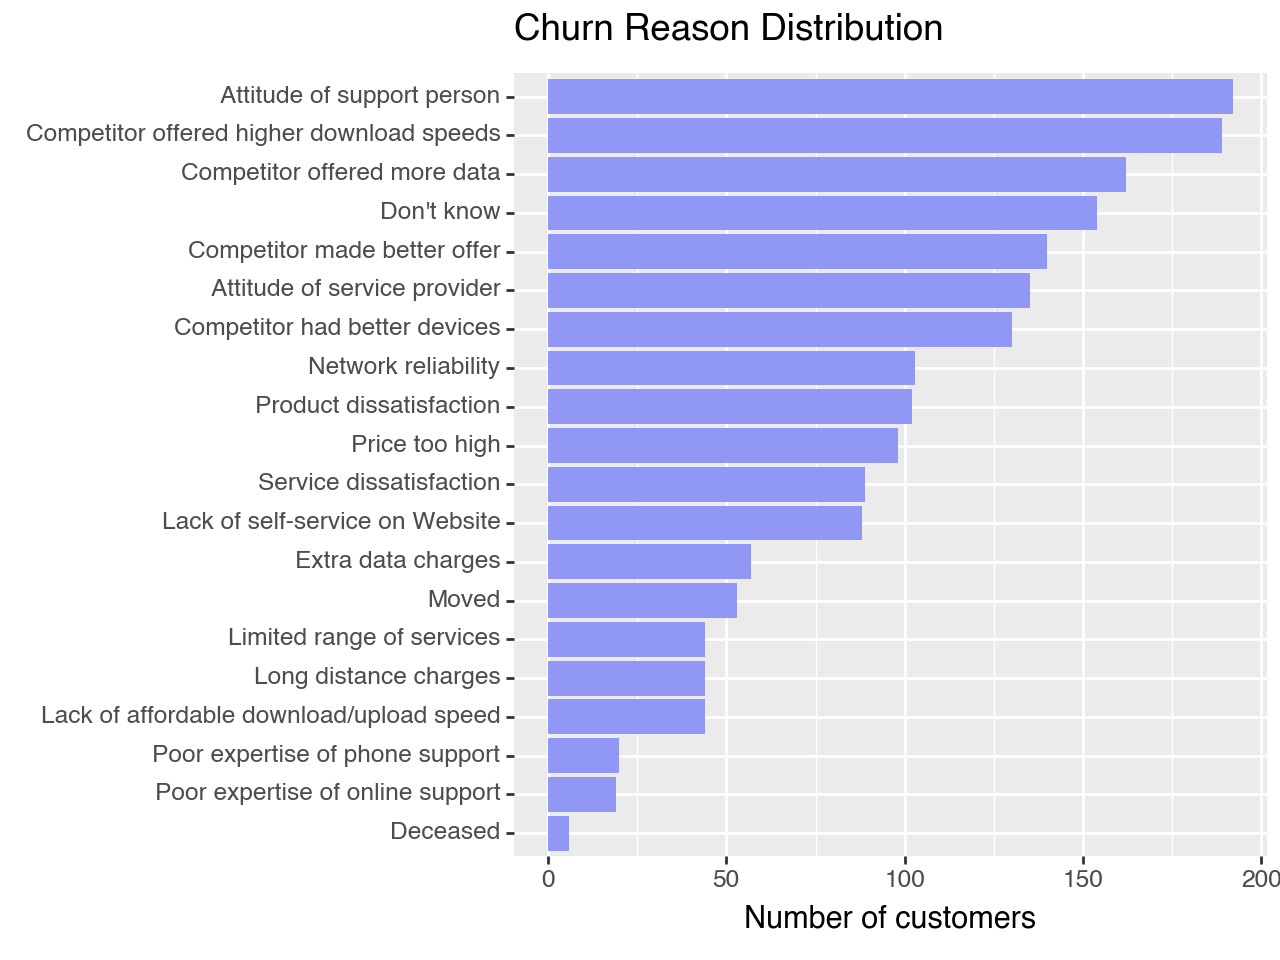

<Figure Size: (640 x 480)>

In [2]:
# Required Imports
import pandas as pd
import plotly.express as px
from plotnine import ggplot, aes, geom_bar, coord_flip, labs, ggsave

# Read the dataset
df_churn = pd.read_excel('Datasets/Telco_customer_churn.xlsx')

# Filter on the column 'Churn Label' to obtain the total number of churned customers
# Create a new data frame with the desired columns
df_reasons = df_churn.loc[df_churn['Churn Label'] == 'Yes']
df_reasons = df_reasons[['CustomerID','Churn Label', 'Churn Reason']]

# Group by 'Churn Reason' and count the number of rows for each reason
reason_counts = df_reasons.groupby('Churn Reason').size().reset_index(name='Number of Rows')

# Sort the DataFrame by the 'Number of Rows' column in descending order
reason_counts = reason_counts.sort_values(by='Number of Rows', ascending=True)

# Convert 'Churn Reason' to a categorical variable with levels ordered by count in descending order
reason_counts['Churn Reason'] = pd.Categorical(reason_counts['Churn Reason'], categories=reason_counts['Churn Reason'])

# Bar Graph colour 
bar_color = '#9097F4'

# Create a ggplot object with a bar plot, flip the axes, set custom labels, and order the bars
reasons_bar_graph = (
    ggplot(reason_counts, aes(x='Churn Reason', y='Number of Rows'))
    + geom_bar(stat='identity', fill=bar_color)
    + coord_flip()
    + labs(x='', y='Number of customers', title='Churn Reason Distribution ')
)

# Display the graph
reasons_bar_graph

## 9. Reflective Evaluation

Working on this project provided a valuable opportunity to apply and showcase acquired visualization and analytical skills. Exploring diverse author perspectives enriched the theoretical foundation, while overcoming challenges in Python and Dash instilled confidence in pursuing advanced analytics. 
Extending the project to a corporate context highlighted the need for increased diligence in data mining. Crucial enhancements, such as incorporating dynamic dashboards with animations and real-time data integration, emerged as pivotal for future iterations. Reflecting on the project prompts consideration of utilizing a more pertinent real-world dataset and implementing refined descriptive analyses using scatter, box, and violin plots. Notably, the project honed essential skills in project management, critical thinking, and problem-solving, proving instrumental for similar projects in the near future. 


## 10. Conclusion

In conclusion, the report successfully achieves its key objectives by offering profound insights into the dynamics of customer churn in the telecom industry. Through meticulous quantitative analysis and insightful visualizations, it effectively quantifies the financial impact of churn and uncovers essential patterns. The strategic dashboard, informed by industry best practices, emerges as a valuable tool for businesses aiming to enhance customer retention and sustain long-term growth.


## References

 - A Guide to Reducing Churn in the Telecom Industry | Vizolution. (2023, January 4). https://www.vizolution.com/blog/complete-guide-to-reduce-churn-in-telecom/#:~:text=In%20terms%20of%20telecoms%2C%20the

- Cairo, A. (2016). The truthful art: Data, charts, and maps for communication. New Riders.

- Chapman, C. (2019). A Complete Overview of the Best Data Visualization Tools. Toptal Design Blog. https://www.toptal.com/designers/data-visualization/data-visualization-tools

- Eckerson, W. W. (2010). Performance Dashboards. John Wiley & Sons.

- Few, S. (2012). Show me the numbers: Designing tables and graphs to enlighten. Analytic Press.

- Freemove. (2023, April 3). Understanding churn rate in the telecom industry. FreeMove Alliance. https://www.freemove.com/magazine/understanding-churn-rate-in-the-telecom-industry/

- Healy, Y. H. and C. (n.d.). From data to Viz | Find the graphic you need. Www.data-To-Viz.com. Retrieved December 5, 2023, from https://www.data-to-viz.com/#bubblemap

- Knaflic, C. N. (2015). Storytelling with Data: A Data Visualization Guide for Business Professionals. Wiley.

- Kirk, A. (2019). Data Visualisation: A Handbook for Data Driven Design (2nd ed.). Sage Publications.

- Lollipop Chart. (n.d.). Data Viz Project. https://datavizproject.com/data-type/lollipop-chart/

- Lucas, L. W. L. (2022, March 21). An approach to better visualisations with Gauge Chart. Medium. https://medium.com/@e0032148/data-viz-gauge-chart-bdba8ac4fcb9

- Munzner, T. (2014). Visualization analysis & design. Crc Press, Taylor & Francis Group.

- Stevens, M. (2020). 10 Free Tools for Dashboards, Data Visualisation and Infographics. Insight Platforms. https://www.insightplatforms.com/10-free-tools-dashboards-data-visualisation-infographics/

- Scaled-up Number. (n.d.). Data Viz Project. https://datavizproject.com/data-type/number/

- Tufte, E. R. (2001). Teaching Collection (Political Science / PUBLGC32) Graphical integrity. Graphics Press.

- Vizolution. (2023, January 4). A Guide to Reducing Churn in the Telecom Industry. https://www.vizolution.com/blog/complete-guide-to-reduce-churn-in-telecom/#:~:text=In%20terms%20of%20telecoms%2C%20the

- Wexler, S., Shaffer, J., & Cotgreave, A. (2017). The Big Book of Dashboards: Visualizing Your Data Using Real-World Business Scenarios. John Wiley & Sons.

- Wickham, H. (2014). Tidy Data. Journal of Statistical Software, 59(10), 1-23. https://doi.org/10.18637/jss.v059.i10
